Step 1: Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN,LSTM,Dense, Dropout,Embedding,BatchNormalization

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

Step 2: Loading the dataset

In [4]:
data=pd.read_csv('R.csv')
print(data.shape)
print(data.info())

(25000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


Step 3: Exploratory Data Analysis

In [5]:
print('Null Values : \n',data.isna().sum())
data=data.dropna()
print('Null Values after dropping :\n',data.isna().sum())


Null Values : 
 Review       1
Sentiment    0
dtype: int64
Null Values after dropping :
 Review       0
Sentiment    0
dtype: int64


In [6]:
data['Sentiment'].value_counts()

Sentiment
1    5000
2    5000
3    5000
4    5000
5    4999
Name: count, dtype: int64

 Text Cleaning

In [7]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\NIKHIL
[nltk_data]     JAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\NIKHIL
[nltk_data]     JAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def clean_reviews(text):
    regex=re.compile('<.*?>')
    text=re.sub(regex,'',text)
    pattern=re.compile('[^a-zA-z0-9\s]')
    text=re.sub(pattern,'',text)
    pattern=re.compile('\d+')
    text=re.sub(pattern,'',text)
    text=text.lower()
    text=word_tokenize(text)
    text=[word for word in text if not word in stop_words]
    return text
data['Review']   = data['Review'].apply(clean_reviews)
    

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\NIKHIL JAIN\AppData\Local\Temp\ipykernel_18580\3937392790.py:4: SyntaxWarning: invalid escape sequence '\s'
  pattern=re.compile('[^a-zA-z0-9\s]')
C:\Users\NIKHIL JAIN\AppData\Local\Temp\ipykernel_18580\3937392790.py:6: SyntaxWarning: invalid escape sequence '\d'
  pattern=re.compile('\d+')


Tokenization & Text Encoding

In [9]:
tokenizer=Tokenizer()
reviews_to_list=data['Review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)
text_sequences=tokenizer.texts_to_sequences(reviews_to_list)
max_words=500
padded_sequences=pad_sequences(text_sequences,maxlen=max_words)
text_sequeces=np.array(padded_sequences)
data=pd.get_dummies(data,columns=['Sentiment'])
X=pad_sequences(text_sequences,maxlen=max_words)
y=data[['Sentiment_1','Sentiment_2','Sentiment_3','Sentiment_4','Sentiment_5',]]
print(X.shape,y.shape)

(24999, 500) (24999, 5)


Train-Test Split:

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19999, 500) (5000, 500) (19999, 5) (5000, 5)


Step 4: Model Building, Compiling andLet’s Training

Build the Model

In [11]:
rnn=Sequential(name='Simple_RNN')
rnn.add(Embedding(len(tokenizer.word_index)+1,max_words,input_length=max_words))
rnn.add(SimpleRNN(128,activation='relu',return_sequences=True))
rnn.add(SimpleRNN(64,activation='relu',return_sequences=False))
rnn.add(Dense(5,activation='softmax'))
print(rnn.summary())

C:\Users\NIKHIL JAIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Compiling the model and Model Evaluation:

In [12]:
rnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=rnn.fit(X_train,y_train,batch_size=64,epochs=2,verbose=1,
validation_data=(X_test,y_test))
print('Simple_RNN Score--->',rnn.evaluate(X_test,y_test,verbose=1))

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.2772 - loss: 1.5933 - val_accuracy: 0.4166 - val_loss: 1.2847
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 268s 857ms/step - accuracy: 0.5245 - loss: 1.1326 - val_accuracy: 0.4382 - val_loss: 1.2752
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.4386 - loss: 1.2684
Simple_RNN Score---> [1.2752312421798706, 0.4381999969482422]


LSTM ( Long Short Term Memory)

In [13]:
model=Sequential(name='LSTM_Model')
model.add(Embedding(len(tokenizer.word_index)+1,max_words,input_length=max_words))
model.add(LSTM(150,return_sequences=False))
BatchNormalization()
model.add(Dropout(.5))
model.add(Dense(50,activation='relu'))
BatchNormalization()
model.add(Dropout(.5))
model.add(Dense(5,activation='softmax'))
print(model.summary())

C:\Users\NIKHIL JAIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=64,epochs=3,verbose=1,validation_data=(X_test,y_test))
print('LSTM model Score-->',model.evaluate(X_test,y_test,verbose=1))

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 843s 3s/step - accuracy: 0.3150 - loss: 1.4867 - val_accuracy: 0.4516 - val_loss: 1.2378
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - accuracy: 0.5218 - loss: 1.1074 - val_accuracy: 0.4602 - val_loss: 1.2302
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.6382 - loss: 0.9036 - val_accuracy: 0.4392 - val_loss: 1.3423
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - accuracy: 0.4353 - loss: 1.3418
LSTM model Score--> [1.34233820438385, 0.4392000138759613]


Text(0, 0.5, 'Accuracy')

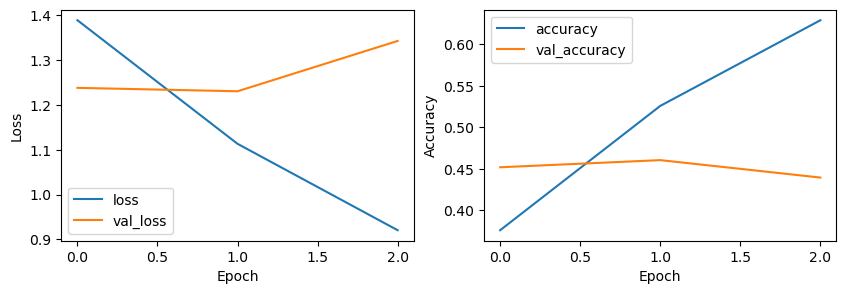

In [15]:
metrics=history.history
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(history.epoch,metrics['loss'],metrics['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(history.epoch,metrics['accuracy'],metrics['val_accuracy']
        )
plt.legend(['accuracy','val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 247ms/step


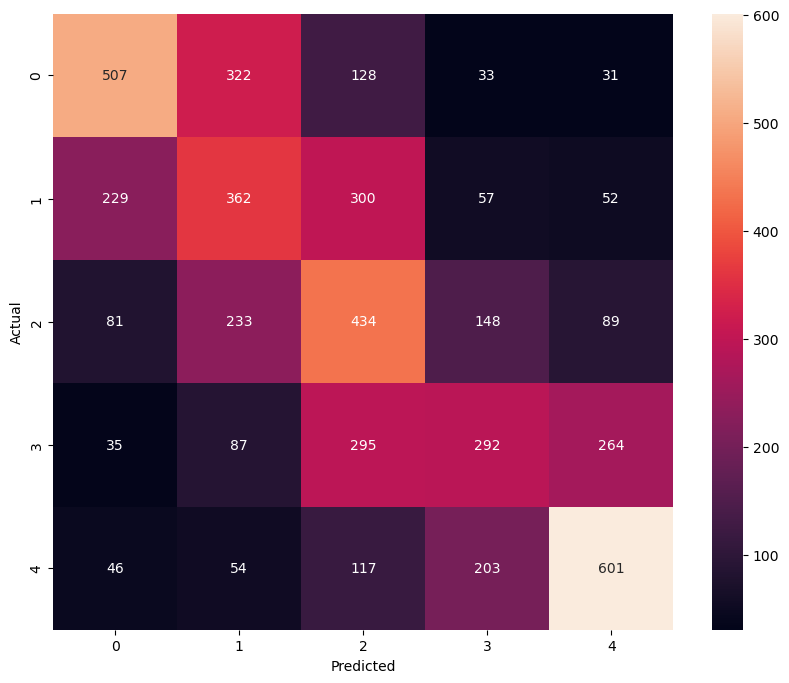

In [16]:
y_true=np.argmax(y_test.values,axis=1)
y_true.shape
y_pred=np.argmax(model.predict(X_test),axis=1)
cm=tf.math.confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
from sklearn.metrics import classification_report
report=classification_report(y_true,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      1021
           1       0.34      0.36      0.35      1000
           2       0.34      0.44      0.38       985
           3       0.40      0.30      0.34       973
           4       0.58      0.59      0.58      1021

    accuracy                           0.44      5000
   macro avg       0.45      0.44      0.44      5000
weighted avg       0.45      0.44      0.44      5000



In [ ]:
def predict_review_rating(text):
  text_sequences_test = np.array(tokenizer.texts_to_sequences([text]))
  testing = pad_sequences(text_sequences_test, maxlen = max_words)
  y_pred_test = np.argmax(model.predict(testing), axis=1)
  return y_pred_test[0]+1

# Testing
rating1 = predict_review_rating('Worst product')
print("The rating according to the review is: ", rating1)

rating2 = predict_review_rating('Awesome product,  I will recommend this to other users.')
print("The rating according to the review is: ", rating2)

In [22]:
def predict_review_rating(text):
    text_sequences_test=np.array(tokenizer.texts_to_sequences([text]))
    testing=pad_sequences(text_sequences_test,maxlen=max_words)
    y_pred_test=np.argmax(model.predict(testing),axis=1)
    return y_pred_test[0]+1
rating1=predict_review_rating('worst product')   
print('The rating according to the review is :', rating1)
rating2 = predict_review_rating('Awesome product,I will recommend this to othe users.')
print('The rating according to the review is ',rating2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
The rating according to the review is : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
The rating according to the review is  5
